# K-Nearest Neighbors (KNN) Classification

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Dataset: https://www.lancaster.ac.uk/pg/hyder/Downloads/downloads.html

In [2]:
# Load data
spiral_data = np.genfromtxt('SpiralData_Clean_Spread.csv', delimiter=',', skip_header=1)

In [3]:
# Preprocess data
X = spiral_data[:,0:2].T
y = spiral_data[:,2].reshape(1,-1)

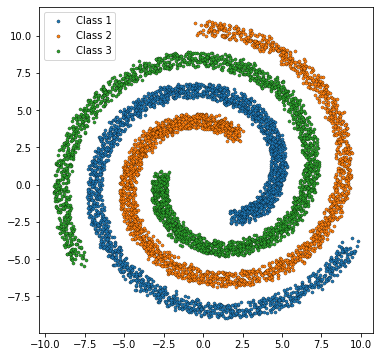

In [4]:
# Plot example
plt.figure(figsize=(6,6))
classes = np.unique(y)
for cls in classes:
    x1_cls = X[0, y.squeeze()==cls]
    x2_cls = X[1, y.squeeze()==cls]
    plt.scatter(x1_cls, x2_cls, s=10, edgecolors='k', linewidths=0.25, label='Class '+str(int(cls)))
plt.legend()

## KNN Classification

In [5]:
def distance(X, x):
    '''
    Calculates Euclidean distance between vector and each vector in matrix.
    
        Parameters:
            X (numpy array)   : n x m matrix of n features of m examples
            x (numpy array)   : n x 1 vector input
        Returns:
            dist (numpy array): m element array of distances
    '''
    dist = np.linalg.norm(X-x, axis=0)
    return dist

In [6]:
def predict_knn(X, y, x, K):
    '''
    Predict the class of given input.
    
        Parameters:
            X (numpy array): n x m matrix of n features of m examples
            y (numpy array): 1 x m matrix of class labels of m examples
            x (numpy array): n x 1 input
            K (int)        : Number of neighbors to consider
        Returns:
            y_pred (int)   : Predicted class label
    '''
    dist = distance(X, x)
    y_nearest = y[0, np.argsort(dist, axis=0)][:K]
    classes, counts = np.unique(y_nearest, return_counts=True)
    y_pred = classes[np.argsort(counts)][-1]
    return int(y_pred)

In [7]:
K = 3
x = np.array([[0,10]]).T
y_pred = predict_knn(X, y, x, K)
print('Predicted class for input', x.squeeze(), '=', y_pred)

Predicted class for input [ 0 10] = 2


## Visualize the Desicison Boundary

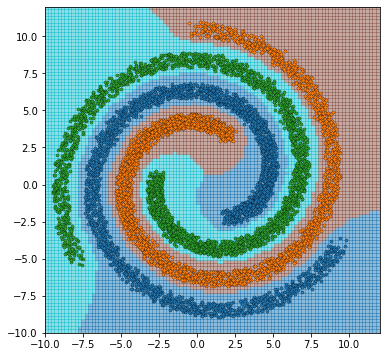

In [10]:
K = 3
x1 = x2 = np.linspace(-10, 12, 100)
xx1, xx2 = np.meshgrid(x1, x2)
yy_pred = np.zeros(xx1.shape)

plt.figure(figsize=(6,6))
for i in range(len(x1)):
    for j in range(len(x2)):
        x = np.array([ [x1[i]], [x2[j]] ])
        x.shape
        yy_pred[i,j] = predict_knn(X, y, x, K) 
plt.pcolormesh(xx1, xx2, yy_pred.T, cmap='tab10', alpha=0.5)
        
classes = np.unique(y)
for cls in classes:
    x1_cls = X[0, y.squeeze()==cls]
    x2_cls = X[1, y.squeeze()==cls]
    plt.scatter(x1_cls, x2_cls, s=10, edgecolors='k', linewidths=0.25)